In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

data_2016 = "president_general_polls_2016.csv"

In [71]:
df = pd.read_csv(data_2016)
df.head()

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,...,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,...,43.34557,41.21439,5.175792,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:35:33 8 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/2/2016,11/6/2016,Ipsos,A-,...,42.02638,38.81620,6.844734,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:35:33 8 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/4/2016,11/7/2016,YouGov,B,...,45.65676,40.92004,6.069454,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:35:33 8 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,...,46.84089,42.33184,3.726098,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:35:33 8 Nov 2016


C:\Users\e.istre91\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


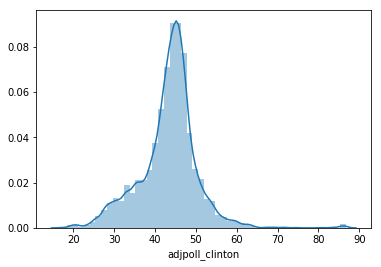

In [72]:
sns.distplot(df["adjpoll_clinton"])
plt.show()

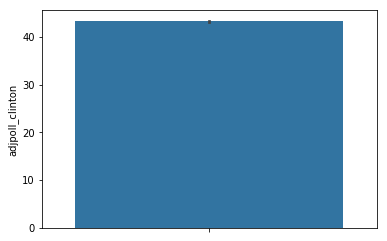

In [73]:
sns.barplot(y=df["adjpoll_clinton"])
plt.show()

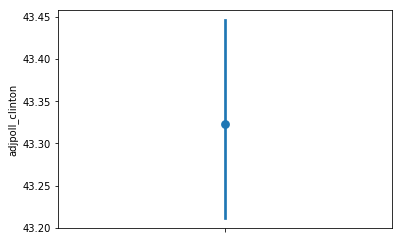

In [74]:
sns.pointplot(y=df["adjpoll_clinton"])
plt.show()

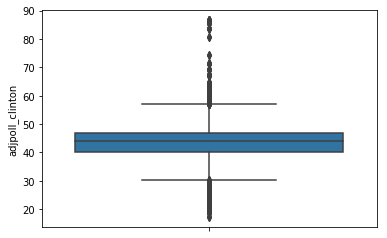

In [75]:
sns.boxplot(y=df["adjpoll_clinton"])
plt.show()

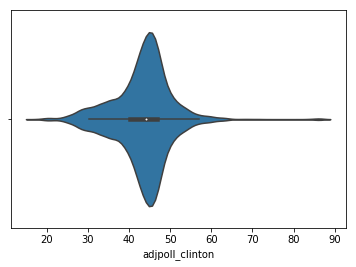

In [76]:
sns.violinplot(x=df["adjpoll_clinton"])
plt.show()

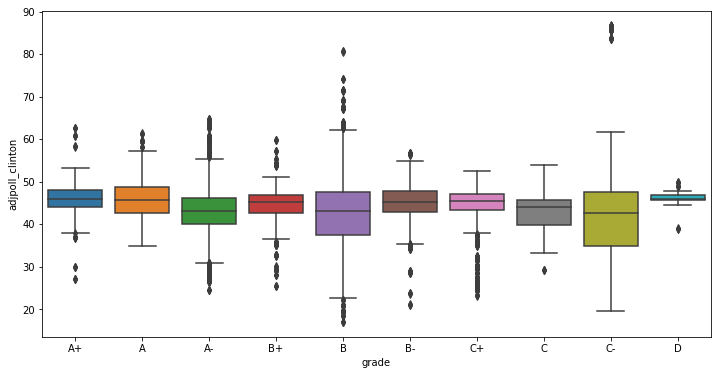

In [77]:
order = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D"]

plt.figure(figsize=(12,6))
sns.boxplot(x="grade", y="adjpoll_clinton", order=order, data=df)
plt.show()

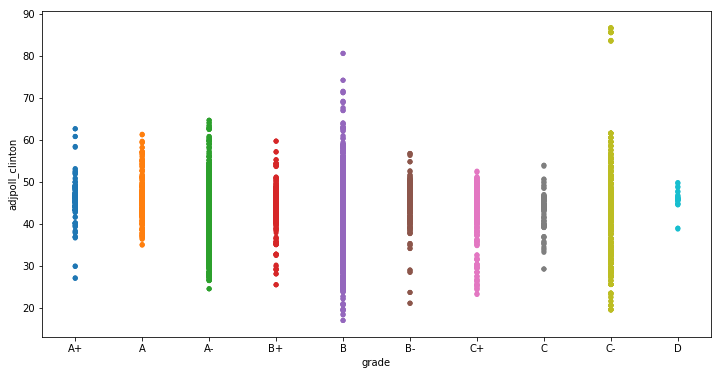

In [78]:
plt.figure(figsize=(12,6))
sns.stripplot(x="grade", y="adjpoll_clinton", order=order, data=df)
plt.show()

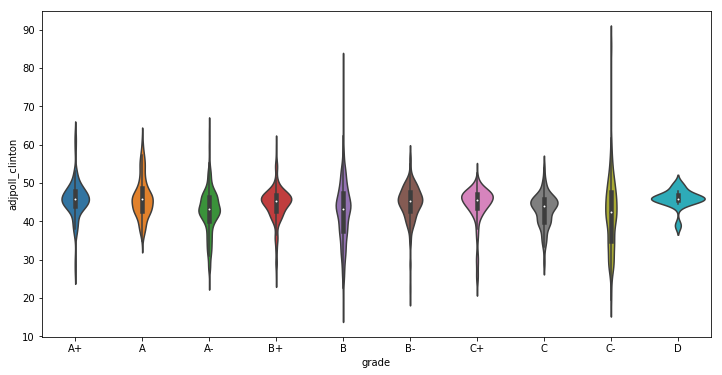

In [79]:
plt.figure(figsize=(12,6))
sns.violinplot(x="grade", y="adjpoll_clinton", order=order, data=df)
plt.show()

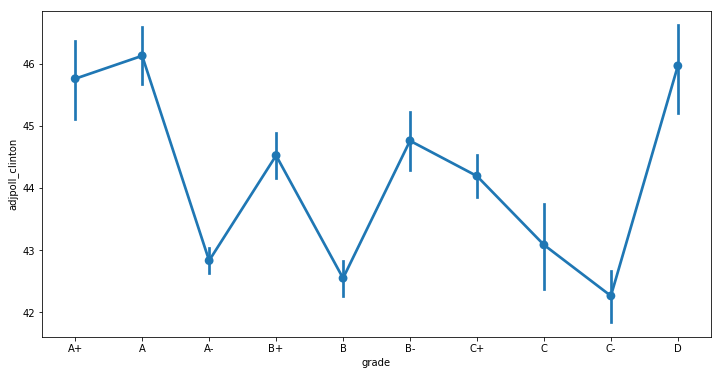

In [80]:
plt.figure(figsize=(12,6))
sns.pointplot(x="grade", y="adjpoll_clinton", order=order, data=df)
plt.show()

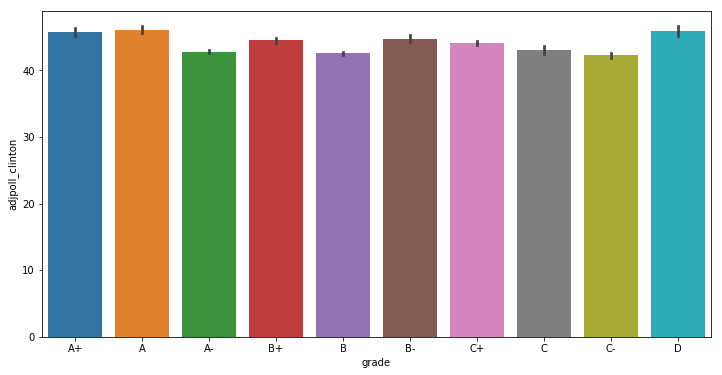

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(x="grade", y="adjpoll_clinton", order=order, data=df)
plt.show()

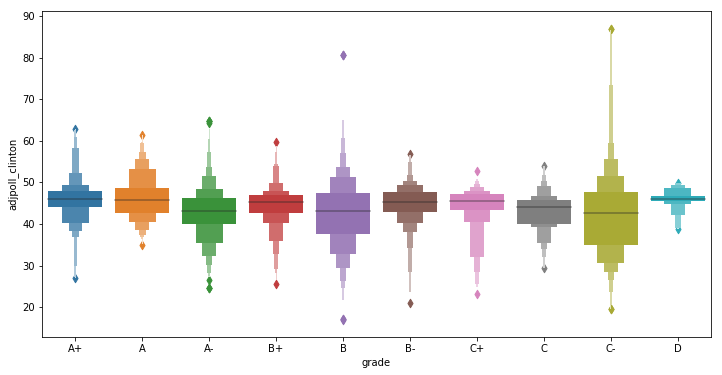

In [82]:
plt.figure(figsize=(12,6))
sns.lvplot(x="grade", y="adjpoll_clinton", order=order, data=df)
plt.show()

C:\Users\e.istre91\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


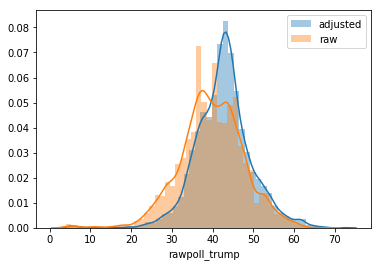

In [83]:
sns.distplot(df["adjpoll_trump"], label="adjusted")
sns.distplot(df["rawpoll_trump"], label="raw")
plt.legend()
plt.show()

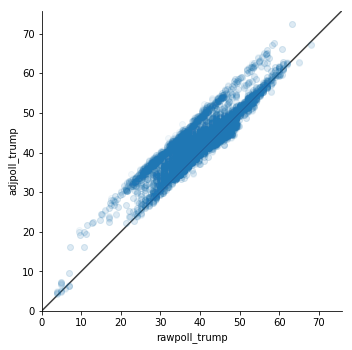

In [84]:
# https://stackoverflow.com/questions/25497402/adding-y-x-to-a-matplotlib-scatter-plot-if-i-havent-kept-track-of-all-the-data
lm = sns.lmplot(x="rawpoll_trump", y="adjpoll_trump", data=df, scatter_kws={'alpha':0.05}, fit_reg=False)
ax = lm.axes[0][0]
lims = [np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()])]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

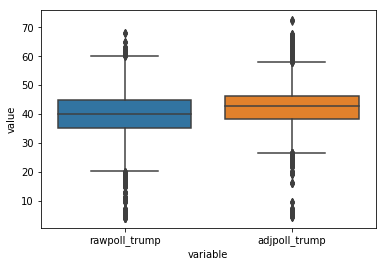

In [85]:
melt_raw_adj = pd.melt(df, id_vars=['poll_id'], value_vars=['rawpoll_trump', 'adjpoll_trump'])
sns.boxplot(x='variable', y='value', data=melt_raw_adj)
plt.show();